# Coursework1: Convolutional Neural Networks 

## instructions

Please submit a version of this notebook containing your answers **together with your trained model** on CATe as CW2.zip. Write your answers in the cells below each question.

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory, which provides free GPU time. You will need a Google account to do so. 

Please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

You will need to install pytorch by running the following cell:

In [ ]:
!pip install torch torchvision

## Introduction

For this coursework you will implement one of the most commonly used model for image recognition tasks, the Residual Network. The architecture is introduced in 2015 by Kaiming He, et al. in the paper ["Deep residual learning for image recognition"](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf). 
<br>

In a residual network, each block contains some convolutional layers, plus "skip" connections, which allow the activations to by pass a layer, and then be summed up with the activations of the skipped layer. The image below illustrates a building block in residual networks.

![resnet-block](utils/resnet-block.png)

Depending on the number of building blocks, resnets can have different architectures, for example ResNet-50, ResNet-101 and etc. Here you are required to build ResNet-18 to perform classification on the CIFAR-10 dataset, therefore your network will have the following architecture:

![resnet](utils/resnet.png)

## Part 1 (40 points)

In this part, you will use basic pytorch operations to define the 2D convolution, max pooling operation, linear layer as well as 2d batch normalization. 

### YOUR TASK

- implement the forward pass for Conv2D, MaxPool2D, Linear and BatchNorm2d
- You are **NOT** allowed to use the torch.nn modules

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """

        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.in_channels = in_channels
        self.out_channels = out_channels
        # self.stride = stride
        
        self.padding = padding

        if type(kernel_size) is tuple :
            self.kernel_size = kernel_size
        else:
            self.kernel_size = (kernel_size, kernel_size)

        if type(stride) is tuple :
            self.stride = stride
        else:
            self.stride = (stride, stride)

        # Good practice is to start your weights in the range of [-y, y] where y=1/sqrt(n)  (n is the number of inputs to a given neuron).
        self.w = torch.randn((out_channels, in_channels, self.kernel_size[0], self.kernel_size[1]), requires_grad = True) \
                 * torch.sqrt(torch.tensor(1.0/in_channels))

        if bias:
            self.b = torch.randn(out_channels, requires_grad = True)  * torch.sqrt(torch.tensor(1.0/in_channels))
        else:
            self.b = None

        self.bias = bias

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """

        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

           #Calculate the output shape
        out_H = (x.shape[2] + 2*self.padding - self.kernel_size[0]) // self.stride[0] + 1
        out_W = (x.shape[3] + 2*self.padding - self.kernel_size[1]) // self.stride[1] + 1

        x_unfold = F.unfold(x, kernel_size = self.kernel_size, padding = self.padding, stride = self.stride)

        if self.bias:
            out_unfold = x_unfold.permute(0, 2, 1).matmul(self.w.view(self.w.size(0), -1).t()).permute(0, 2, 1) + self.b.view(-1, 1)
        else:
            out_unfold = x_unfold.permute(0, 2, 1).matmul(self.w.view(self.w.size(0), -1).t()).permute(0, 2, 1)
        out = out_unfold.view(x.shape[0], self.out_channels, out_H, out_W)

        # for testing the function
        # out_test = nn.functional.conv2d(x, self.w, self.b, padding=1)
        # print((out_test - out).abs().max())

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out
# for testing the function
# inputs = torch.rand(3, 3, 24, 24)
# conv2 = Conv2d(in_channels=3, out_channels=3, kernel_size=(3, 3),stride=1, padding=1)
# out = conv2(inputs)

In [ ]:
class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if type(kernel_size) is tuple :
            self.kernel_size = kernel_size
        else:
            self.kernel_size = (kernel_size, kernel_size)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        H_k, W_k = self.kernel_size

        x_unfold = F.unfold(x, kernel_size = self.kernel_size, stride = self.kernel_size)

        x_reshape = x_unfold.view(x.shape[0], x.shape[1], self.kernel_size[0] * self.kernel_size[1], -1)

        x_max = x_reshape.max(axis = 2)[0]

        H_out = x.shape[2] // H_k
        W_out = x.shape[3] // W_k

        out = x_max.view(x.shape[0], x.shape[1], H_out, W_out)
        # print(out == nn.functional.max_pool2d(x, kernel_size = self.kernel_size))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out
# inputs = torch.rand(2, 2, 3, 4)
# maxpool = MaxPool2d(kernel_size=2)
# print(maxpool.forward(inputs).shape)


In [ ]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.weight = torch.randn((in_channels, out_channels), requires_grad = True) * torch.sqrt(torch.tensor(1.0/in_channels))

        if bias:
            self.bias = torch.randn(out_channels, requires_grad = True)  * torch.sqrt(torch.tensor(1.0/in_channels))
        else:
            self.bias = None

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if self.bias != None:
            out = torch.matmul(x, self.weight) + self.bias
        else:
            out = torch.matmul(x, self.weight)
        # nn.functional.linear(x,self.weight, self.bias)
        # print(out == nn.functional.linear(x,self.weight.t(), self.bias))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out
# inputs = torch.rand(3, 3, 23, 23)
# linear = Linear(in_channels=23, out_channels = 4)
# out2 = linear.forward(inputs)

In [60]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum – the value used for the running_mean and running_var
        computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.gamma = torch.ones(num_features, requires_grad = True)
        self.beta = torch.zeros(num_features, requires_grad = True)
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)
        self.training = True


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if self.training:
            mean = x.mean([0, 2, 3])
            var = x.var([0, 2, 3])
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var
            var = x.var([0, 2, 3], unbiased = False)
        else:
            mean = self.running_mean
            var = self.running_var
            
        x = (x - mean.view(1, -1, 1, 1)) / torch.sqrt(var + self.eps).view(1, -1, 1, 1) * self.gamma.view(1, -1, 1, 1) \
            + self.beta.view(1, -1, 1, 1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return x
# inputs = torch.rand(3, 3, 23, 23)
# batch = BatchNorm2d(3)
# test = nn.BatchNorm2d(3)

# for i in range(3):
#     out = test.forward(inputs)
#     out2 = batch.forward(inputs)
# # test.training = False
# # batch.training = False
# out = test.forward(inputs)
# out2 = batch.forward(inputs)
# for i in range(5):
#     out = test.forward(inputs)
#     out2 = batch.forward(inputs)
# print(out)
# print(out2)
# print(test.running_var)
# print(batch.running_var)

## Part 2

In this part, you will train a ResNet-18 defined on the CIFAR-10 dataset. Code for training and evaluation are provided. 

### Your Task

1. Train your network to achieve the best possible test set accuracy after a maximum of 10 epochs of training.

2. You can use techniques such as optimal hyper-parameter searching, data pre-processing

3. If necessary, you can also use another optimizer

4. **Answer the following question:**
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? 

**YOUR ANSWER FOR PART 2.4 HERE**

A: In my view, Bayesian Optimisation can be one of the best strategies to find the quit good hyperparameters. As we know, the time and power for training can be quit huge under large number of data if you just search the hyperparameters with grid search, worsely you even cannot get the good ones. While, you can find a better hyperparameter combination with a very small number of steps with Bayesian Optimisation.

In [1]:
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F

Next, we define ResNet-18:

In [2]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
    # define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 10):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.maxpool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc(x)
        
        return x
    
    
def ResNet18():
    return ResNet(ResidualBlock)

### Loading dataset
We will import images from the [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html) library <br>
First, we need to define the alterations (transforms) we want to perform to our images - given that transformations are applied when importing the data. <br>
Define the following transforms using the torchvision.datasets library -- you can read the transforms documentation [here](https://pytorch.org/docs/stable/torchvision/transforms.html): <br>
1. Convert images to tensor
2. Normalize mean and std of images with values:mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]

In [3]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset

import numpy as np

import torchvision.transforms as T

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################

transform_aug = T.Compose([
    T.RandomRotation(10),
    T.RandomCrop(size=32, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean = [0.4914, 0.4822, 0.4465], std = [0.2023, 0.1994, 0.2010])
])

transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean = [0.4914, 0.4822, 0.4465], std = [0.2023, 0.1994, 0.2010])
])

##############################################################
#                       END OF YOUR CODE                     #
##############################################################




Now load the dataset using the transform you defined above, with batch_size = 64<br>
You can check the documentation [here](https://pytorch.org/docs/stable/torchvision/datasets.html).
Then create data loaders (using DataLoader from torch.utils.data) for the training and test set

In [4]:

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################

data_dir = './data'

cifar10_train_data = dset.CIFAR10(data_dir, train = True, download = True, transform = transform_aug)
loader_train = DataLoader(cifar10_train_data, batch_size=64, sampler=sampler.SubsetRandomSampler(range(49000)))

cifar10_val_data = dset.CIFAR10(data_dir, train = True, download = True, transform = transform)
loader_val = DataLoader(cifar10_val_data, batch_size=64, sampler=sampler.SubsetRandomSampler(range(49000, 50000)))

cifar10_test = dset.CIFAR10(data_dir, train = False, download = True, transform = transform)
loader_test = DataLoader(cifar10_test, batch_size=64)
##############################################################
#                       END OF YOUR CODE                     #       
##############################################################



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print_every = 100
def check_accuracy(loader, model):
    # function for test accuracy on validation and test set
    
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc # add by Tianyu Dai
        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        print(len(loader_train))
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                # check_accuracy(loader_val, model)
                print()



In [6]:
# code for optimising your network performance

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################

## I have used two method to optimising my net work, one without learn rate scheduler, while other with it.
#  for the function train_part2, the scheduler parameter is added.

def train_part2(model, optimizer, epochs=1, scheduler = None):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        print(len(loader_train))
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                check_accuracy(loader_val, model)
                print()
        scheduler.step()

In [ ]:
!pip install GPyopt

     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 1.0MB 21.8MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
  Created wheel for GPyopt: filename=GPyOpt-1.2.6-cp36-none-any.whl size=83623 sha256=5db6858d32c213a07b1f1924813580754150a4c4a7894107adbc7f32977a4b48
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633961 sha256=2106a6e2d1a2e6f68018fb879721db2d5fa9eec5001a5116076fc30743971ca3
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=60318d6e522d1e31f8c4e3258dc400d55ea6e67145312874cb7f218c26528451
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPyopt GPy paramz


In [ ]:
import GPyOpt
def Bayes_Opt(parameters):
    lr = parameters[0, 0]
    weight_decay = parameters[0, 1]
    print("---- New lr = %.5f and weight_decay = %.5f ----"% (lr, weight_decay))
    model = ResNet18()
    optimizer = optim.Adam(model.parameters(),lr = lr, weight_decay = weight_decay)
    train_part(model, optimizer, epochs = 10)
    return check_accuracy(loader_val, model)

domain = [  {'name' : 'lr', 'type': 'continuous', 'domain': (0.0005, 0.005)},
        {'name': 'weight_decay', 'type': 'continuous', 'domain': (0.0001, 0.001)},  ]
opt = GPyOpt.methods.BayesianOptimization(f = Bayes_Opt,domain = domain,acquisition_type ='LCB',acquisition_weight = 0.1,maximize = True)


opt.run_optimization( max_iter = 10)



---- New lr = 0.00212 and weight_decay = 0.00013 ----
766
Epoch: 0, Iteration 0, loss = 3.6991
Checking accuracy on validation set
Got 107 / 1000 correct (10.70)

Epoch: 0, Iteration 100, loss = 1.6612
Checking accuracy on validation set
Got 313 / 1000 correct (31.30)

Epoch: 0, Iteration 200, loss = 1.6770
Checking accuracy on validation set
Got 340 / 1000 correct (34.00)

Epoch: 0, Iteration 300, loss = 1.5844
Checking accuracy on validation set
Got 384 / 1000 correct (38.40)

Epoch: 0, Iteration 400, loss = 1.7507
Checking accuracy on validation set
Got 372 / 1000 correct (37.20)

Epoch: 0, Iteration 500, loss = 1.5577
Checking accuracy on validation set
Got 471 / 1000 correct (47.10)

Epoch: 0, Iteration 600, loss = 1.6247
Checking accuracy on validation set
Got 422 / 1000 correct (42.20)

Epoch: 0, Iteration 700, loss = 1.4275
Checking accuracy on validation set
Got 500 / 1000 correct (50.00)

766
Epoch: 1, Iteration 0, loss = 1.5315
Checking accuracy on validation set
Got 538 / 1

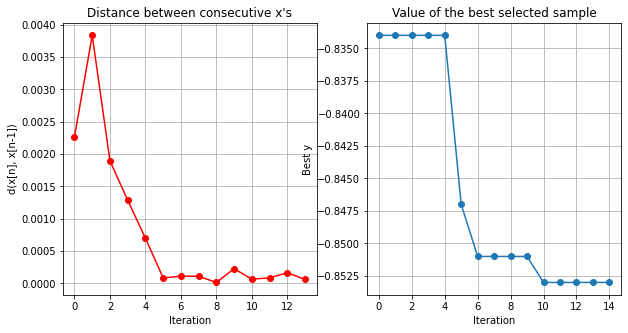

Best Hyperparameters:  [0.00051311 0.00097364]
Best Accuracy:  -0.853


In [ ]:
opt.plot_convergence()
print("Best Hyperparameters: ", opt.x_opt)
print("Best Accuracy: ", opt.fx_opt)
##############################################################
#                       END OF YOUR CODE                     #
##############################################################

In [ ]:
# define and train the network
model = ResNet18()
optimizer = optim.Adam(model.parameters(),lr = 0.000513, weight_decay = 0.000973)

train_part(model, optimizer, epochs = 10)


# report test set accuracy

check_accuracy(loader_test, model)


# save the model
torch.save(model.state_dict(), 'model(83.8).pt')

766
Epoch: 0, Iteration 0, loss = 3.8242

Epoch: 0, Iteration 100, loss = 1.6075

Epoch: 0, Iteration 200, loss = 1.5011

Epoch: 0, Iteration 300, loss = 1.3821

Epoch: 0, Iteration 400, loss = 1.2997

Epoch: 0, Iteration 500, loss = 1.1808

Epoch: 0, Iteration 600, loss = 1.6881

Epoch: 0, Iteration 700, loss = 1.0739

766
Epoch: 1, Iteration 0, loss = 1.2621

Epoch: 1, Iteration 100, loss = 0.9631

Epoch: 1, Iteration 200, loss = 1.3792

Epoch: 1, Iteration 300, loss = 1.1428

Epoch: 1, Iteration 400, loss = 0.9323

Epoch: 1, Iteration 500, loss = 0.7955

Epoch: 1, Iteration 600, loss = 1.0677

Epoch: 1, Iteration 700, loss = 0.9228

766
Epoch: 2, Iteration 0, loss = 0.8093

Epoch: 2, Iteration 100, loss = 0.7533

Epoch: 2, Iteration 200, loss = 0.8682

Epoch: 2, Iteration 300, loss = 0.8569

Epoch: 2, Iteration 400, loss = 0.7559

Epoch: 2, Iteration 500, loss = 0.6908

Epoch: 2, Iteration 600, loss = 0.6042

Epoch: 2, Iteration 700, loss = 0.5876

766
Epoch: 3, Iteration 0, loss = 

### Method 1 Result

Method 1 Accuracy is 83.81 %.

Then I add learning rate scheduler trying to get a better model.

In [ ]:
import GPyOpt
def Bayes_Opt2(parameters):
    lr = parameters[0, 0]
    gamma = parameters[0, 1]
    print("---- New lr = %.5f  and gamma = %.3f ----"% (lr, gamma))
    model = ResNet18()
    optimizer = optim.Adam(model.parameters(),lr = lr)
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 9], gamma=gamma)
    train_part2(model, optimizer, epochs = 10, scheduler = scheduler)
    return check_accuracy(loader_val, model)

domain = [  {'name' : 'lr', 'type': 'continuous', 'domain': (0.0001, 0.005)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0.1, 0.2)},  ]
opt2 = GPyOpt.methods.BayesianOptimization(f = Bayes_Opt2,domain = domain,acquisition_type ='LCB', acquisition_weight = 0.1, maximize = True)


opt2.run_optimization( max_iter = 10)

---- New lr = 0.00491  and gamma = 0.103 ----
766
Epoch: 0, Iteration 0, loss = 3.4908
Checking accuracy on validation set
Got 87 / 1000 correct (8.70)

Epoch: 0, Iteration 100, loss = 1.9779
Checking accuracy on validation set
Got 261 / 1000 correct (26.10)

Epoch: 0, Iteration 200, loss = 1.8863
Checking accuracy on validation set
Got 278 / 1000 correct (27.80)

Epoch: 0, Iteration 300, loss = 2.0314
Checking accuracy on validation set
Got 397 / 1000 correct (39.70)

Epoch: 0, Iteration 400, loss = 1.5723
Checking accuracy on validation set
Got 372 / 1000 correct (37.20)

Epoch: 0, Iteration 500, loss = 1.5974
Checking accuracy on validation set
Got 421 / 1000 correct (42.10)

Epoch: 0, Iteration 600, loss = 1.5917
Checking accuracy on validation set
Got 452 / 1000 correct (45.20)

Epoch: 0, Iteration 700, loss = 1.5624
Checking accuracy on validation set
Got 490 / 1000 correct (49.00)

766
Epoch: 1, Iteration 0, loss = 1.4231
Checking accuracy on validation set
Got 475 / 1000 correc

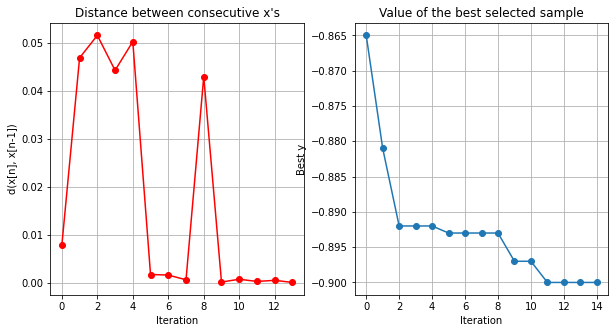

Best Hyperparameters:  [0.00039521 0.15641885]
Best Accuracy:  -0.9


In [ ]:
opt2.plot_convergence()
print("Best Hyperparameters: ", opt2.x_opt)
print("Best Accuracy: ", opt2.fx_opt)

In [12]:
model = ResNet18()
optimizer = optim.Adam(model.parameters(),lr = 0.000395)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[9, 10], gamma=0.1564)
train_part2(model, optimizer, epochs = 10, scheduler = scheduler)

check_accuracy(loader_test, model)


# save the model
torch.save(model.state_dict(), 'model.pt')

766
Epoch: 0, Iteration 0, loss = 3.5337
Checking accuracy on validation set
Got 111 / 1000 correct (11.10)

Epoch: 0, Iteration 100, loss = 1.6355
Checking accuracy on validation set
Got 404 / 1000 correct (40.40)

Epoch: 0, Iteration 200, loss = 1.4058
Checking accuracy on validation set
Got 476 / 1000 correct (47.60)

Epoch: 0, Iteration 300, loss = 1.3713
Checking accuracy on validation set
Got 450 / 1000 correct (45.00)

Epoch: 0, Iteration 400, loss = 1.3050
Checking accuracy on validation set
Got 533 / 1000 correct (53.30)

Epoch: 0, Iteration 500, loss = 1.2080
Checking accuracy on validation set
Got 580 / 1000 correct (58.00)

Epoch: 0, Iteration 600, loss = 1.1986
Checking accuracy on validation set
Got 622 / 1000 correct (62.20)

Epoch: 0, Iteration 700, loss = 1.2054
Checking accuracy on validation set
Got 574 / 1000 correct (57.40)

766
Epoch: 1, Iteration 0, loss = 1.0314
Checking accuracy on validation set
Got 604 / 1000 correct (60.40)

Epoch: 1, Iteration 100, loss = 1

### Method 2 Result

Method 2 Accuracy is 89.58 %.

## Part 3

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions**: 

1. Compare the feature maps from low-level layers to high-level layers, what do you observe? 

2. Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance?

3. What are the other possible ways to analyse the performance of your network?

**YOUR ANSWER FOR PART 3 HERE**

A:

Q1 :

I choose the 35th image of the dataset, which looks like a kind of fish. On the lower-level layers, you can see outline of them, however with the higher-level layer, we can only see some details of images. In other words, on the higher level layers, you cannot distinguish what it is, there are only some abstract objects on the images.

Q2 :

In the Part2, I have used two methods to train the data. As for the Method 1, I just use data augmemtation, which helps generalisation of the network, and using finally, the accuracy is 83.81%, I think this result is not so bad.

However, in the Method 2, I added learning rate schedule, which can help reaching the global minimum and not getting overshooting when minimising the loss. It can be quite helpful for the accuracy can be up to 89.58%.

Actually, if we train more epochs or get more training datas or use dropout, the performance can be much better.

Q3 :

We can use confusion matrix. Actually, we can not only pay attention on the accuracy, for example, the recall, precison, f-score are all helpful to let us know the performance of my network. Maybe graphs of error rates can be used to show something like overfitting much easier.



<Figure size 432x288 with 0 Axes>

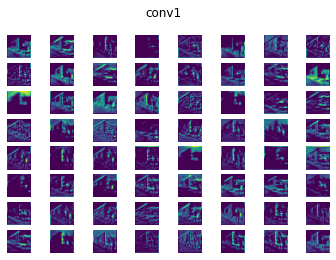

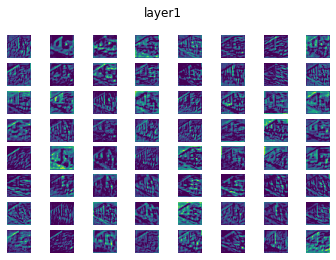

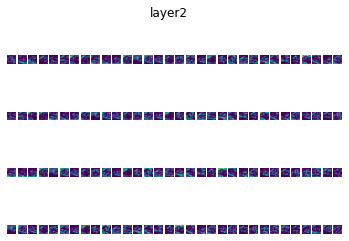

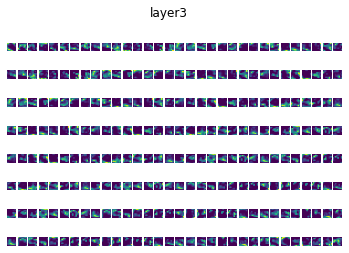

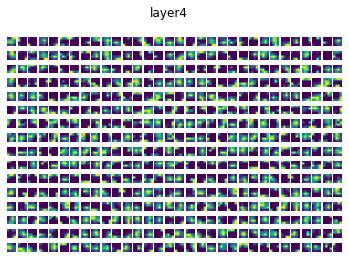

In [8]:
#!pip install matplotlib

import matplotlib.pyplot as plt

plt.tight_layout()
# model = ResNet18()
# model.load_state_dict(torch.load('model.pt'))
# model.to(device)
# model.eval()

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

for l in vis_labels:

    getattr(model, l).register_forward_hook(get_activation(l))
    
    
data, _ = cifar10_test[34]
data = data.unsqueeze_(0).to(device = device, dtype = dtype)

output = model(data)



for idx, l in enumerate(vis_labels):

    act = activation[l].squeeze()

    if idx < 2:
        ncols = 8
    else:
        ncols = 32
        
    nrows = act.size(0) // ncols
    
    fig, axarr = plt.subplots(nrows, ncols)
    fig.suptitle(l)


    for i in range(nrows):
        for j in range(ncols):
            axarr[i, j].imshow(act[i * nrows + j].cpu())
            axarr[i, j].axis('off')